In [205]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import config 
import tmdbsimple as tmdb          # tmdbsimple 2.2.0
import time
tmdb.API_KEY = config.tmdb_api_key # get TMDB API key from config.py file

In [206]:
#get Dustin Hoffman's TMDB id
search_hoffman = tmdb.Search()      
response_hoffman = search_hoffman.person(query='Dustin Hoffman')
hoffman_id = search_hoffman.results[0]['id']
hoffman_id

4483

In [207]:
#Now get hoffman's credits
search_hoffman_id = tmdb.People(hoffman_id)
response_hoffman_id = search_hoffman_id.movie_credits()
response_hoffman_id


{'cast': [{'character': 'Raymond Babbitt',
   'credit_id': '52fe423cc3a36847f800e8b7',
   'poster_path': '/vllKYkA7eYi2UMM9yWQ1JegefBh.jpg',
   'id': 380,
   'video': False,
   'vote_count': 3318,
   'adult': False,
   'backdrop_path': '/eZ4Aj1O6E95Mk5O9oKKdvfnSWzf.jpg',
   'genre_ids': [18],
   'original_language': 'en',
   'original_title': 'Rain Man',
   'popularity': 12.537,
   'title': 'Rain Man',
   'vote_average': 7.7,
   'overview': "Selfish yuppie Charlie Babbitt's father left a fortune to his savant brother Raymond and a pittance to Charlie; they travel cross-country.",
   'release_date': '1988-12-11'},
  {'character': 'Stanley Motss',
   'credit_id': '52fe4258c3a36847f8016f15',
   'poster_path': '/cGatilylRyJiCoOu5T5sAB17HKR.jpg',
   'id': 586,
   'video': False,
   'vote_count': 459,
   'adult': False,
   'backdrop_path': '/bWoNwo04ZfZoEvEF8gliyB1EAyS.jpg',
   'genre_ids': [35, 18],
   'original_language': 'en',
   'original_title': 'Wag the Dog',
   'popularity': 8.809,
  

In [208]:
hoffman_n = len(response_hoffman_id['cast'][:])
hoffman_n   #how many movies

108

In [209]:
#Put all records in actor's first part of Data Frame (ie. hoffman_df)
labels = ['title','popularity','vote_average','vote_count']
idx = [film['id'] for film in response_hoffman_id['cast'][:]]
records = []
for film in (response_hoffman_id['cast'][:]):
    record = [film['title'], film['popularity'], film['vote_average'], film['vote_count']]
    records.append(record)

hoffman_df = pd.DataFrame.from_records(records, columns=labels, index=idx)
hoffman_df

,title,popularity,vote_average,vote_count
380,Rain Man,12.54,7.70,3318
586,Wag the Dog,8.81,6.90,459
693,Meet the Fockers,12.60,6.20,2796
819,Sleepers,13.22,7.50,1485
866,Finding Neverland,12.21,7.30,2353
879,Hook,15.84,6.90,3087
891,All the President's Men,18.09,7.70,809
994,Straw Dogs,12.40,7.20,406
1262,Stranger Than Fiction,9.49,7.20,1243
1427,Perfume: The Story of a Murderer,11.90,7.20,2356


In [210]:
#Now get 2nd part of actor's df from the tmdb.Movies for merging
labels = ['revenue','budget','profit','genres']
film_indices = [film[0] for film in hoffman_df.iterrows()]
#print(film_indices)
records = []
request_rate_limit = 40     #TMDB has rate limit of 40 requests per 10 seconds

for film_idx in film_indices:
    request_rate_limit -= 1
    if request_rate_limit == 0:            
        print("Hold yer horses, cowboy!")
        print("...wait per request limit...")
        time.sleep(10)
        request_rate_limit = 39
    movie = tmdb.Movies(film_idx)  #Each movie has unique identifier stored as index of df
    response = movie.info()
        
    profit = response['revenue'] - response['budget']
    record = [response['revenue'], response['budget'], profit, response['genres']]
    
    records.append(record)
#    if request_rate_limit <37: break

hoffman_movies_df = pd.DataFrame.from_records(records, columns=labels, index=film_indices)
hoffman_movies_df    


Hold yer horses, cowboy!
...wait per request limit...
Hold yer horses, cowboy!
...wait per request limit...


,revenue,budget,profit,genres
380,412800000,25000000,387800000,"[{'id': 18, 'name': 'Drama'}]"
586,64256513,15000000,49256513,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
693,516642939,80000000,436642939,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
819,165615285,44000000,121615285,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
866,116766556,25000000,91766556,"[{'id': 18, 'name': 'Drama'}]"
879,300854823,70000000,230854823,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
891,70600000,8500000,62100000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
994,3251794,2200000,1051794,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
1262,53653224,30000000,23653224,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
1427,132180323,50000000,82180323,"[{'id': 80, 'name': 'Crime'}, {'id': 14, 'name..."


In [212]:
print(hoffman_df.shape)
hoffman_df.head(5)

(108, 4)


,title,popularity,vote_average,vote_count
380,Rain Man,12.54,7.70,3318
586,Wag the Dog,8.81,6.90,459
693,Meet the Fockers,12.60,6.20,2796
819,Sleepers,13.22,7.50,1485
866,Finding Neverland,12.21,7.30,2353


In [213]:
print(hoffman_movies_df.shape)
hoffman_movies_df.head(5)

(108, 4)


,revenue,budget,profit,genres
380,412800000,25000000,387800000,"[{'id': 18, 'name': 'Drama'}]"
586,64256513,15000000,49256513,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
693,516642939,80000000,436642939,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
819,165615285,44000000,121615285,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
866,116766556,25000000,91766556,"[{'id': 18, 'name': 'Drama'}]"


In [214]:
# This builds the full df, still need to build final
hoffman_full_df = pd.merge(hoffman_df, hoffman_movies_df, left_index=True, right_index=True)
print(hoffman_full_df.shape)
hoffman_full_df

(108, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genres
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,"[{'id': 18, 'name': 'Drama'}]"
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
866,Finding Neverland,12.21,7.30,2353,116766556,25000000,91766556,"[{'id': 18, 'name': 'Drama'}]"
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
891,All the President's Men,18.09,7.70,809,70600000,8500000,62100000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
994,Straw Dogs,12.40,7.20,406,3251794,2200000,1051794,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
1262,Stranger Than Fiction,9.49,7.20,1243,53653224,30000000,23653224,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
1427,Perfume: The Story of a Murderer,11.90,7.20,2356,132180323,50000000,82180323,"[{'id': 80, 'name': 'Crime'}, {'id': 14, 'name..."


In [215]:
#
def to_list(cell):
    #input is a single cell containing a list of dicts
    #rreturns a list of genres as unique strings
    l = []
    for d in cell:     #cell is list of dicts
        l.append(d['name'])
    return(l)

hoffman_full_df['genre_names'] = hoffman_full_df['genres'].map(to_list)
hoffman_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genres,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,"[{'id': 18, 'name': 'Drama'}]",[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama]"
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[Comedy, Romance]"
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[Crime, Drama, Thriller]"
866,Finding Neverland,12.21,7.30,2353,116766556,25000000,91766556,"[{'id': 18, 'name': 'Drama'}]",[Drama]
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.09,7.70,809,70600000,8500000,62100000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[Drama, History, Mystery, Thriller]"
994,Straw Dogs,12.40,7.20,406,3251794,2200000,1051794,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,9.49,7.20,1243,53653224,30000000,23653224,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,11.90,7.20,2356,132180323,50000000,82180323,"[{'id': 80, 'name': 'Crime'}, {'id': 14, 'name...","[Crime, Fantasy, Drama]"


In [216]:
hoffman_full_df.drop(['genres'], axis=1, inplace=True)
hoffman_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,12.21,7.30,2353,116766556,25000000,91766556,[Drama]
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.09,7.70,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,12.40,7.20,406,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,9.49,7.20,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,11.90,7.20,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"


In [217]:
print(hoffman_full_df.shape)
hoffman_full_df.describe()

(108, 8)


,popularity,vote_average,vote_count,revenue,budget,profit
count,108.00,108.00,108.00,108.00,108.00,108.00
mean,6.03,5.61,531.20,"54,488,792.89","18,096,666.67","36,392,126.22"
std,5.42,2.73,"1,034.58","126,834,970.42","34,069,419.57","101,493,169.02"
min,0.60,0.00,0.00,0.00,0.00,"-48,000,000.00"
25%,0.79,5.57,1.00,0.00,0.00,0.00
50%,5.11,6.45,63.50,0.00,0.00,0.00
75%,9.56,7.20,515.75,"47,792,701.25","21,250,000.00","19,238,706.50"
max,27.96,10.00,"6,405.00","665,692,281.00","150,000,000.00","515,692,281.00"


Delete rows with non-movies (eg. Documentary(99), TV Movie(10770) ). Deciding what constitutes a genre.
1. Eliminate rows containing Documentery or TV Movie as a genre.
2. Eliminate rows where revenue or budget are zero.
3. Exclude Music(10402) from consideration because it doesn't say what kind of genre. It could be a dramatic, romantic or acomedy, and adventure etc... I have not seen a movie classified as solely music. So, perhaps don't delete it, just think of it as a secondary classification, at least initially.
4. Cluster analysis:
    A. Drama(18) - could include Crime(80), and War(10752);
    B. Comedy(35);
    C. Romance(10749);
    D. Family(10751) and Animation(16);
    E. Western(37);
    F. Action(28)/Adventure(12);
    G. Science Fiction(878);
    H. Horror(27) and Mystery(9648) and Thriller(53).

In [218]:
hoffman_full_df.head(3)

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"


In [ ]:
# If Genres is in Documentary(99), TV Movie(10770), delete the row.
# If revenue, budget or profit is zero or NaN, eliminate the row.
# If vote_count	< 20, eliminate the row.


In [223]:
# #Are there any missing values?
# test_missing_df = hoffman_full_df.dropna()
# test_missing_df
hoffman_full_df.isnull().sum()

title           0
popularity      0
vote_average    0
vote_count      0
revenue         0
budget          0
profit          0
genre_names     0
dtype: int64

In [224]:
#Function removes excluded genres per cell, then .map to genres column
def exclude_genres(cell):
    '''looks for excluded values in a cell
       returns boolean mask'''
    excluded_genre = ['TV Movie','Documentary']
#    print(cell)
    if len(cell) == 0:
        return False
    else:
        for g in excluded_genre:
           if g in cell:
               return False
    return True

hoffman_full_df = hoffman_full_df[hoffman_full_df.genre_names.map(exclude_genres)]            
print(hoffman_full_df.shape)
print(hoffman_full_df.describe())
hoffman_full_df

(68, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count       68.00         68.00       68.00          68.00          68.00   
mean         8.76          6.39      838.18  86,519,929.35  28,741,176.47   
std          4.99          1.41    1,204.48 151,260,686.81  39,283,642.24   
min          0.60          0.00        0.00           0.00           0.00   
25%          5.93          6.18       86.75           0.00           0.00   
50%          8.94          6.65      330.50  14,627,302.00  10,300,000.00   
75%         11.50          7.20      932.25  96,264,073.00  48,500,000.00   
max         27.96          8.00    6,405.00 665,692,281.00 150,000,000.00   

              profit  
count          68.00  
mean   57,778,752.88  
std   123,277,025.94  
min   -48,000,000.00  
25%             0.00  
50%     5,650,327.00  
75%    65,097,802.75  
max   515,692,281.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,12.21,7.30,2353,116766556,25000000,91766556,[Drama]
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.09,7.70,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,12.40,7.20,406,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,9.49,7.20,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,11.90,7.20,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"


In [225]:
#Eliminate the rows without budget or revenue data
good_money_df = hoffman_full_df[(hoffman_full_df.budget > 0.0) & (hoffman_full_df.revenue > 0.0)]
pd.options.display.float_format = '{:,.2f}'.format
#good_money_df['revenue'] = good_money_df['revenue'].apply(lambda x: '{:d}'.format(x))

#good_money_df['budget'] = good_money_df['budget'].apply(lambda x: '{:,.2f}'.format(x))

#good_money_df['profit'] = good_money_df['profit'].apply(lambda x: '{:,.2f}'.format(x))
#print(good_money_df.info())
print(good_money_df.shape)
#print(good_money_df.describe())
good_money_df

(38, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,12.21,7.30,2353,116766556,25000000,91766556,[Drama]
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.09,7.70,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,12.40,7.20,406,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,9.49,7.20,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,11.90,7.20,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"


In [231]:
def is_action(cell):
    #gen_names is list of categories to check
    #returns True if in, else false (formasking)
    if 'Action' in cell:
        return True 
    return False

action_genre = ['Action']
action_mask = good_money_df[good_money_df.genre_names.map(not(is_action))]            
print(action_mask.shape)
print(action_mask.describe())
action_mask

(7, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count        7.00          7.00        7.00           7.00           7.00   
mean        10.72          6.04      801.29 132,810,905.43  63,857,142.86   
std          3.90          0.75    1,062.61 182,706,275.51  41,159,966.68   
min          5.05          4.40       56.00  10,541,523.00  15,000,000.00   
25%          8.81          6.10      173.00  18,694,693.50  48,500,000.00   
50%         10.73          6.30      436.00  66,976,317.00  50,000,000.00   
75%         11.99          6.35      836.50 146,799,143.00  70,000,000.00   
max         17.64          6.70    3,098.00 521,170,825.00 145,000,000.00   

              profit  
count           7.00  
mean   68,953,762.57  
std   149,776,804.78  
min   -40,624,819.00  
25%   -28,741,080.00  
50%     8,014,206.00  
75%    98,299,143.00  
max   376,170,825.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
10047,The Messenger: The Story of Joan of Arc,12.40,6.30,746,66976317,85000000,-18023683,"[Adventure, Drama, Action, History, War]"
10743,Confidence,10.73,6.30,210,23014206,15000000,8014206,"[Action, Comedy, Thriller, Crime, Mystery]"
6950,Outbreak,9.32,6.40,927,189859560,50000000,139859560,"[Action, Drama, Science Fiction, Thriller]"
12704,Ishtar,5.05,4.40,56,14375181,55000000,-40624819,"[Action, Adventure, Comedy]"
9770,Mad City,8.30,6.10,136,10541523,50000000,-39458477,"[Action, Drama, Thriller]"
140300,Kung Fu Panda 3,17.64,6.70,3098,521170825,145000000,376170825,"[Action, Adventure, Animation, Comedy, Family]"
8592,Dick Tracy,11.59,6.10,436,103738726,47000000,56738726,"[Adventure, Action, Comedy, Thriller, Crime]"


In [234]:
def is_action(cell):
    #gen_names is list of categories to check
    #returns True if in, else false (formasking)
    if 'Action' in cell:
        return True 
    return False

action_genre = ['Action']
action_mask = good_money_df[False == good_money_df.genre_names.map(is_action)]  #not Action
print(action_mask.shape)
print(action_mask.describe())
action_mask

(31, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count       31.00         31.00       31.00          31.00          31.00   
mean        11.61          6.91    1,515.97 156,234,747.77  45,012,903.23   
std          4.37          0.72    1,419.05 178,532,798.85  42,227,342.97   
min          2.65          5.20       45.00   3,251,794.00   2,200,000.00   
25%          9.04          6.55      478.50  45,376,494.00  11,500,000.00   
50%         10.90          7.10      877.00  88,933,562.00  30,000,000.00   
75%         12.98          7.45    2,354.50 185,684,350.00  70,000,000.00   
max         27.96          8.00    6,405.00 665,692,281.00 150,000,000.00   

              profit  
count          31.00  
mean  111,221,844.55  
std   150,997,344.73  
min   -42,979,723.00  
25%    19,543,851.00  
50%    62,100,000.00  
75%   115,391,992.50  
max   515,692,281.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,12.21,7.30,2353,116766556,25000000,91766556,[Drama]
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
891,All the President's Men,18.09,7.70,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,12.40,7.20,406,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,9.49,7.20,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,11.90,7.20,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"


In [241]:
def is_drama(cell):
    #returns True if in, else false (for masking)
    if 'Drama' in cell:
        return True 
    return False

drama = good_money_df[good_money_df.genre_names.map(is_drama)]  
print(drama.shape)
print(drama.describe())
drama.head(3)

(22, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       22.00         22.00       22.00          22.00         22.00   
mean        10.27          7.09      946.73  81,320,592.23 28,790,909.09   
std          3.03          0.61      837.52  90,684,899.45 24,695,573.33   
min          2.65          6.00       45.00   3,251,794.00  2,200,000.00   
25%          8.82          6.53      414.50  24,171,653.00  8,775,000.00   
50%          9.50          7.20      777.50  58,954,868.50 23,000,000.00   
75%         12.35          7.50    1,189.25 105,931,326.25 48,500,000.00   
max         18.09          8.00    3,318.00 412,800,000.00 85,000,000.00   

              profit  
count          22.00  
mean   52,529,683.14  
std    91,222,291.56  
min   -42,979,723.00  
25%    -3,647,374.50  
50%    32,419,138.50  
75%    89,369,997.75  
max   387,800,000.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"


In [242]:
def is_drama(cell):
    #returns True if in, else false (for masking)
    if 'Drama' in cell:
        return True 
    return False

not_drama = good_money_df[False == good_money_df.genre_names.map(is_drama)]  #not Drama
print(not_drama.shape)
print(not_drama.describe())
not_drama.head(3)  

(16, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count       16.00         16.00       16.00          16.00          16.00   
mean        13.06          6.29    1,986.00 248,993,780.62  75,562,500.00   
std          5.18          0.81    1,739.11 220,078,104.99  46,630,417.47   
min          5.05          4.40       56.00  14,375,181.00  11,000,000.00   
25%          9.99          5.75      482.50  88,425,171.50  42,750,000.00   
50%         12.09          6.50    1,925.00 185,684,350.00  70,000,000.00   
75%         15.04          6.93    3,089.75 362,148,673.50 107,500,000.00   
max         27.96          7.20    6,405.00 665,692,281.00 150,000,000.00   

              profit  
count          16.00  
mean  173,431,280.62  
std   185,948,708.22  
min   -40,624,819.00  
25%    32,950,951.25  
50%    89,121,172.50  
75%   267,183,823.50  
max   515,692,281.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
10199,The Tale of Despereaux,14.29,5.80,498,86900000,60000000,26900000,"[Adventure, Animation, Family]"


In [244]:
len(drama['popularity'])

22

[Text(0, 0, 'Drama'), Text(0, 0, 'Not Drama')]

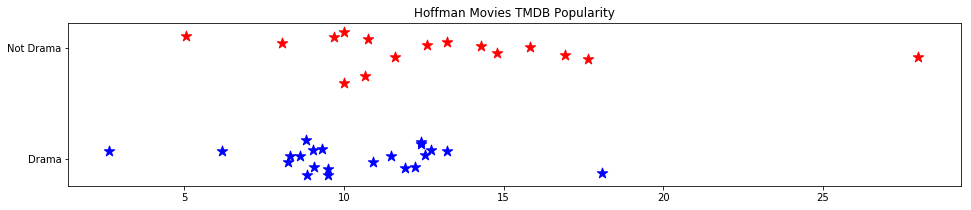

In [275]:
#Plot the distribution for popularity
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(drama['popularity'], np.repeat(0, len(drama['popularity'])) + np.random.normal(0, 0.1, len(drama['popularity'])), marker="*", c='blue', s=120)
ax.scatter(not_drama['popularity'], np.repeat(1, len(not_drama['popularity'])) + np.random.normal(0, 0.1, len(not_drama['popularity'])),marker="*", c='red', s=120)
plt.title('Hoffman Movies TMDB Popularity')
ax.set_yticks([0, 1])
ax.set_yticklabels(["Drama", "Not Drama"])

Null Hypothesis: H0 - There is no difference in the popularity of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test

In [260]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_drama_wins = count_winning_pairs(not_drama['popularity'], drama['popularity'])
drama_wins = count_winning_pairs(drama['popularity'], not_drama['popularity'])
print("Number of 'Not Dramatic' Movie Wins: {}".format(not_drama_wins))
print("Number of 'Dramatic' Movie Wins: {}".format(drama_wins))

Number of 'Not Dramatic' Movie Wins: 244.0
Number of 'Dramatic' Movie Wins: 108.0


The total number of wins is the total number of comparisons between a popularity of a dramatic movie and the popularity of a non-dramatic movie.

In [268]:
print("Total Number of Wins: {}\n\n'...'is EQUAL to...\n".format(not_drama_wins + drama_wins))
print("Total Number of Comparisons: {}".format(
    len(not_drama['profit'])*len(drama['profit'])))

Total Number of Wins: 352.0

'...'is EQUAL to...

Total Number of Comparisons: 352


In [264]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_drama['popularity'], drama['popularity'], alternative="greater")
print("p-value for 'Not Dramatic' Movie Popularity > Dramatic Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not Dramatic' Movie Popularity > Dramatic Movie Popularity: 0.023


Clearly, Non Dramatic Hoffman movies are more popular than his Dramatic movies, at least in the measure of popularity in the TMDB.

[Text(0, 0, 'Drama'), Text(0, 0, 'Not Drama')]

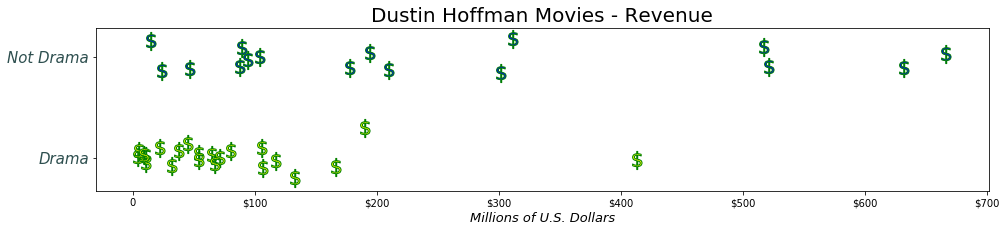

In [355]:
#Plot the distribution for profit
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(drama['revenue'], np.repeat(0, len(drama['revenue'])) + np.random.normal(0, 0.1, len(drama['revenue'])), marker='$''\$''$', c='yellow', edgecolors='green', s=330)
ax.scatter(not_drama['revenue'], np.repeat(1, len(not_drama['revenue'])) + np.random.normal(0, 0.1, len(not_drama['revenue'])),marker='$''\$''$',c='blue', edgecolors='green', s=330)
plt.title('Dustin Hoffman Movies - Revenue', size=20)


def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / 1000000))
    if N == 0:
        return "0"
    elif N == 100:
        return ("$100")
    elif N == 200:
        return ("$200")
    elif N == 300:
        return ("$300")
    elif N == 400:
        return ("$400")
    elif N == 500:
        return ("$500")
    elif N == 600:
        return ("$600")
    elif N == 700:
        return ("$700")
    else:
        return ("$800")

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xlabel('Millions of U.S. Dollars', backgroundcolor='white', color='k', animated=True, fontstyle='italic', size=13)
#ax.xaxis.set_major_locator(plt.MultipleLocator(100000000))
ax.set_yticks([0, 1])
ax.set_yticklabels(["Drama", "Not Drama"], fontstyle='oblique', color=(.18, .31, .31), size='15')

Null Hypothesis: H0 - There is no difference in the revenue of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test

In [304]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_drama_wins = count_winning_pairs(not_drama['revenue'], drama['revenue'])
drama_wins = count_winning_pairs(drama['revenue'], not_drama['revenue'])
print("Number of 'Not Dramatic' Movie Wins: {}".format(not_drama_wins))
print("Number of 'Dramatic' Movie Wins: {}".format(drama_wins))

Number of 'Not Dramatic' Movie Wins: 272.0
Number of 'Dramatic' Movie Wins: 80.0


Remember, the total number of "wins" is the total number of comparisons between the revenue of a dramatic movie and the revenue of a non-dramatic movie.

In [306]:
print("Total Number of Wins: {}\n\n'...'is EQUAL to...\n".format(not_drama_wins + drama_wins))
print("Total Number of Comparisons: {}".format(
    len(not_drama['revenue'])*len(drama['revenue'])))

Total Number of Wins: 352.0

'...'is EQUAL to...

Total Number of Comparisons: 352


In [307]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_drama['revenue'], drama['revenue'], alternative="greater")
print("p-value for 'Not Dramatic' Movie Revenue > Dramatic Movie Revenue: {:2.3f}".format(res.pvalue))

p-value for 'Not Dramatic' Movie Revenue > Dramatic Movie Revenue: 0.002


Clearly, Non Dramatic Hoffman movies are make more money than his Dramatic movies.

In [308]:
not_drama

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
693,Meet the Fockers,12.60,6.20,2796,516642939,80000000,436642939,"[Comedy, Romance]"
879,Hook,15.84,6.90,3087,300854823,70000000,230854823,"[Adventure, Fantasy, Comedy, Family]"
10199,The Tale of Despereaux,14.29,5.80,498,86900000,60000000,26900000,"[Adventure, Animation, Family]"
10743,Confidence,10.73,6.30,210,23014206,15000000,8014206,"[Action, Comedy, Thriller, Crime, Mystery]"
9502,Kung Fu Panda,16.93,7.10,6405,631744560,130000000,501744560,"[Adventure, Animation, Family, Comedy]"
12704,Ishtar,5.05,4.40,56,14375181,55000000,-40624819,"[Action, Adventure, Comedy]"
11774,Lemony Snicket's A Series of Unfortunate Events,27.96,6.80,3135,209073645,140000000,69073645,"[Adventure, Comedy, Family]"
39451,Little Fockers,8.07,5.60,1985,310650585,100000000,210650585,"[Comedy, Romance]"
49444,Kung Fu Panda 2,14.78,6.80,3796,665692281,150000000,515692281,"[Animation, Family]"
140300,Kung Fu Panda 3,17.64,6.70,3098,521170825,145000000,376170825,"[Action, Adventure, Animation, Comedy, Family]"


In [309]:
drama


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
380,Rain Man,12.54,7.70,3318,412800000,25000000,387800000,[Drama]
586,Wag the Dog,8.81,6.90,459,64256513,15000000,49256513,"[Comedy, Drama]"
819,Sleepers,13.22,7.50,1485,165615285,44000000,121615285,"[Crime, Drama, Thriller]"
866,Finding Neverland,12.21,7.30,2353,116766556,25000000,91766556,[Drama]
891,All the President's Men,18.09,7.70,809,70600000,8500000,62100000,"[Drama, History, Mystery, Thriller]"
994,Straw Dogs,12.40,7.20,406,3251794,2200000,1051794,"[Crime, Drama, Thriller]"
1262,Stranger Than Fiction,9.49,7.20,1243,53653224,30000000,23653224,"[Comedy, Drama, Fantasy, Romance]"
1427,Perfume: The Story of a Murderer,11.90,7.20,2356,132180323,50000000,82180323,"[Crime, Fantasy, Drama]"
10047,The Messenger: The Story of Joan of Arc,12.40,6.30,746,66976317,85000000,-18023683,"[Adventure, Drama, Action, History, War]"
10153,Sphere,11.48,6.00,816,37020277,80000000,-42979723,"[Science Fiction, Drama, Horror, Mystery]"
